In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

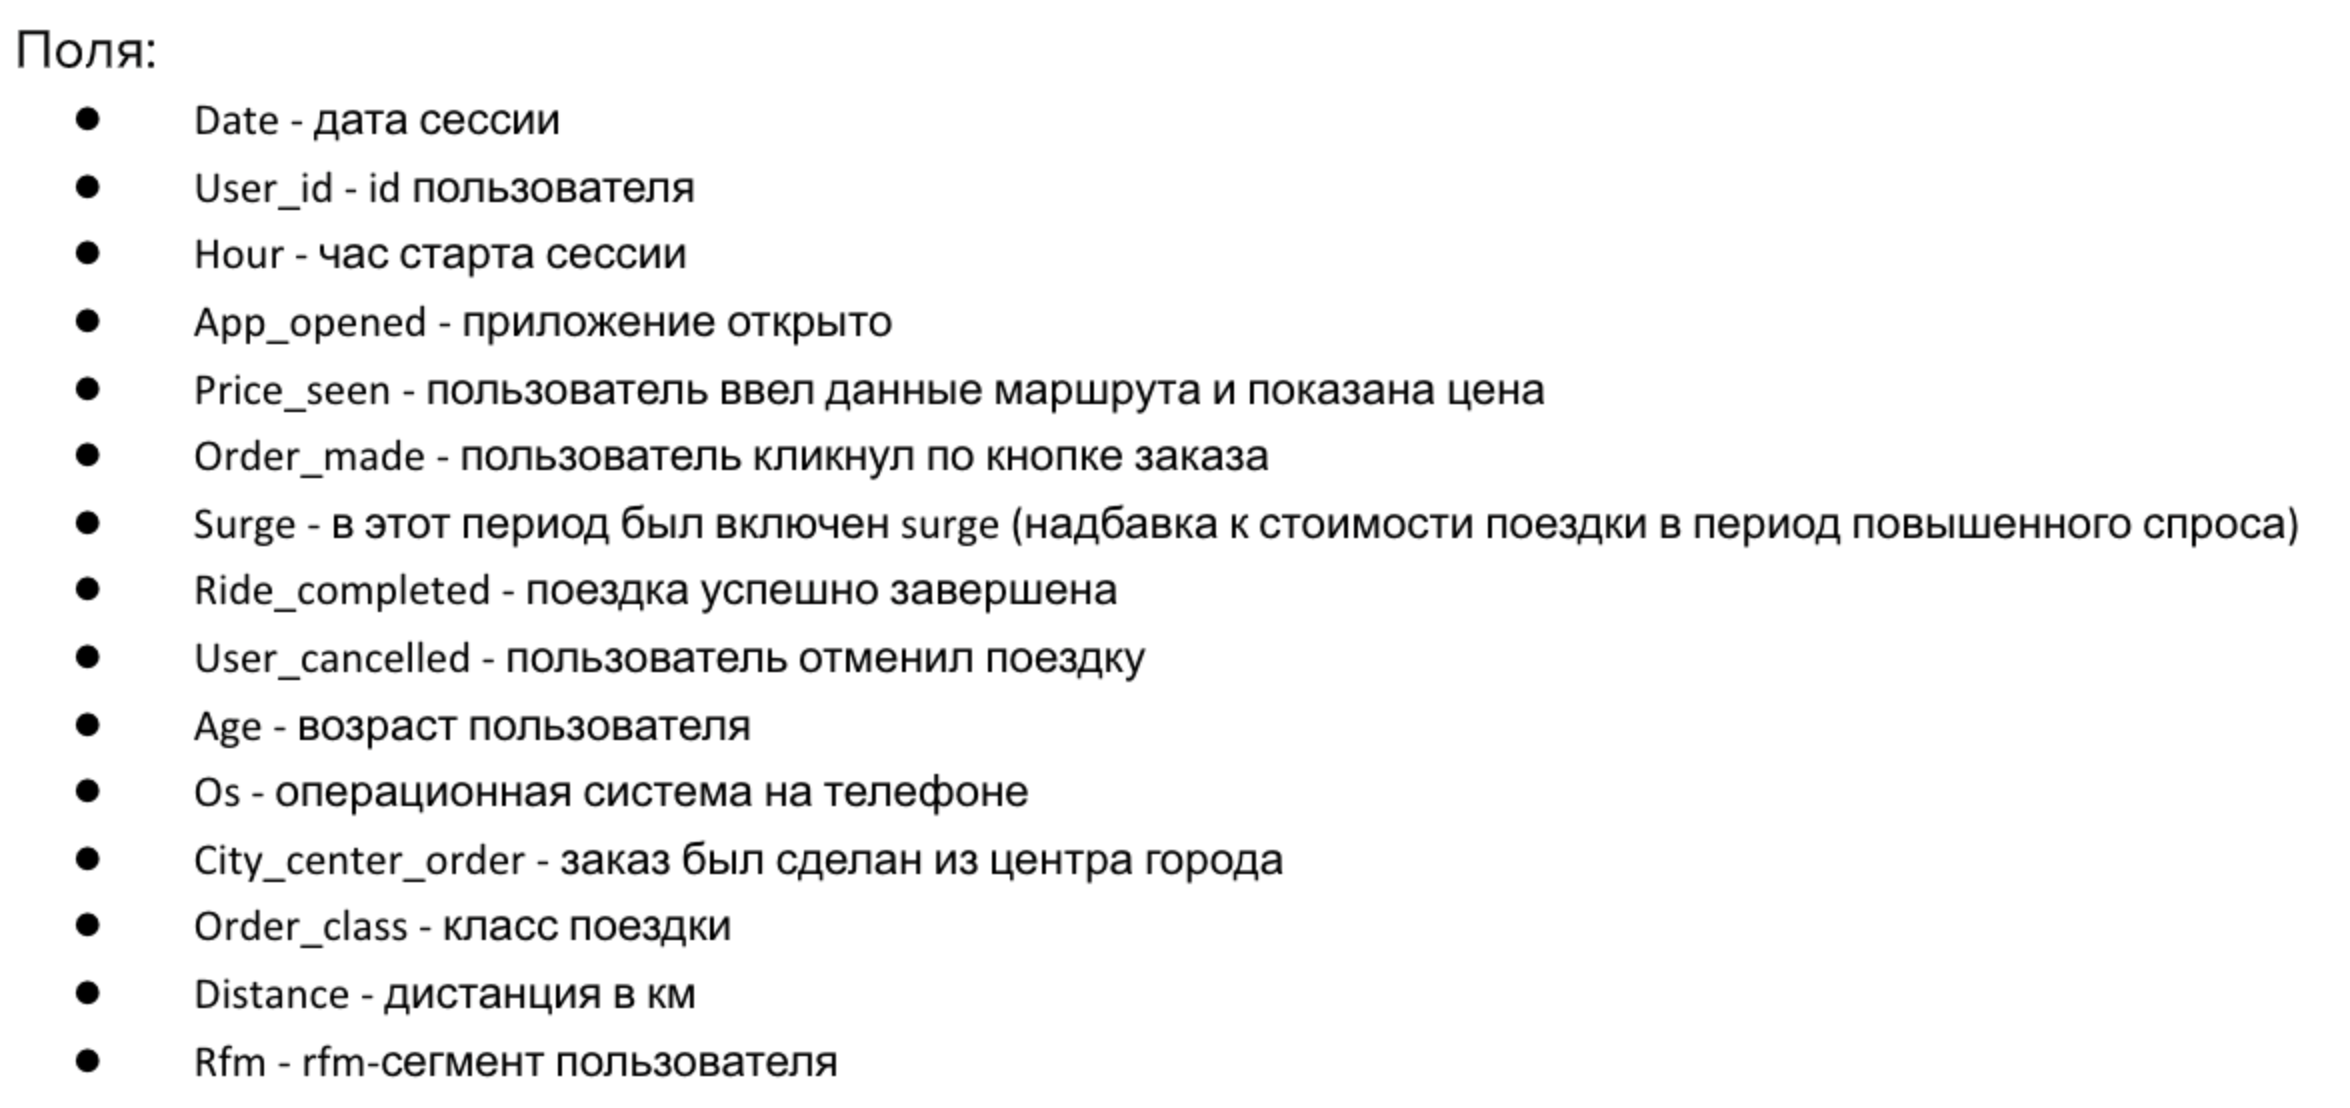

In [22]:
df = pd.read_csv('Netology_A_B-testing_HW_1.csv')
df = df.sort_values(by=['user_id','date'])
df

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm
43053,43053,2020-05-19,100093,15,1,1,1,no surge,1,0,31,iOS,0,comfort,1.537912,medium
78482,78482,2020-05-20,100093,7,1,1,1,surge,1,0,59,Android,1,economy,7.965125,low
91648,91648,2020-05-20,100093,1,1,1,1,no surge,1,0,59,Android,0,comfort,1.646884,low
54398,54398,2020-05-21,100093,1,1,1,0,surge,0,0,21,iOS,0,economy,10.215434,medium
37281,37281,2020-05-18,100118,22,1,1,1,no surge,0,1,44,Android,0,economy,0.960993,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51025,51025,2020-05-23,999978,1,1,1,1,no surge,1,0,34,iOS,1,economy,1.148010,medium
79269,79269,2020-05-23,999978,18,1,0,0,NaN,0,0,18,iOS,0,economy,NaN,low
95861,95861,2020-05-23,999978,0,1,1,1,no surge,1,0,43,iOS,1,business,6.964840,medium
16211,16211,2020-05-24,999978,19,1,1,0,no surge,0,0,23,Android,0,economy,2.960731,low


## 1. Цена показана / не показана

In [48]:
df.groupby('price_seen').agg({'user_id':'count','order_made':'sum','ride_completed':'sum'})

# если будем показывать цену всем пользователям всегда, то конверсия в заказ будет >0, потому что для пользователя стоимость не будет сюрпризом и он заранее будет информирован от ней.

,user_id,order_made,ride_completed
price_seen,,,
0,10069,0,0
1,91431,74236,62967


In [85]:
t = df.groupby(['hour','os']).agg({'user_id':'count','order_made':'sum','ride_completed':'sum'})
t['conv_order_made'] = t['order_made'] / t['user_id']
t['conv_ride_completed'] = t['ride_completed'] / t['order_made']
t.sort_values(by='conv_order_made')[:20]
# в 7-9 утром и вечером меньшая конверсия в заказ у пользователей Андроид - снизить цену
# Если снизить цену для пользователей Андроид с 7 до 9 часов утра и вечера, конверсия в заказ вырастет. 
# (Не факт, тк не знаем причины маленькой конверсии)

,,user_id,order_made,ride_completed,conv_order_made,conv_ride_completed
hour,os,,,,,
8,Android,2325,1284,1058,0.552258,0.823988
9,Android,2474,1407,1148,0.568715,0.815920
19,Android,2386,1373,1144,0.575440,0.833212
20,Android,2420,1409,1155,0.582231,0.819730
21,Android,2485,1470,1185,0.591549,0.806122
7,Android,2364,1409,1115,0.596024,0.791341
9,iOS,1841,1255,1110,0.681695,0.884462
8,iOS,1824,1282,1153,0.702851,0.899376
21,iOS,1819,1282,1142,0.704783,0.890796


## 2. День недели

In [88]:
tt = df.groupby(['date','os']).agg({'user_id':'count','order_made':'sum','ride_completed':'sum'})
tt['conv_order_made'] = tt['order_made'] / tt['user_id']
tt['conv_ride_completed'] = tt['ride_completed'] / tt['order_made']
tt.sort_values(by='conv_order_made')[:20]

# у Андроида в целом конверсия хуже, чем у iOS
# Если изменить интерфейс в приложении для Андроид, то конверсия в заказы увеличится на 5%.

,,user_id,order_made,ride_completed,conv_order_made,conv_ride_completed
date,os,,,,,
2020-05-19,Android,8233,5569,4571,0.676424,0.820794
2020-05-22,Android,8127,5536,4519,0.681186,0.816293
2020-05-20,Android,8081,5524,4407,0.683579,0.797791
2020-05-21,Android,8264,5668,4542,0.685866,0.801341
2020-05-18,Android,8060,5537,4530,0.686973,0.818133
2020-05-23,Android,8022,5514,4480,0.687360,0.812477
2020-05-24,Android,7909,5453,4399,0.689468,0.806712
2020-05-18,iOS,6378,5014,4447,0.786140,0.886917
2020-05-23,iOS,6444,5070,4478,0.786778,0.883235


In [91]:
t1 = df.groupby(['date','order_class']).agg({'user_id':'count','order_made':'sum','ride_completed':'sum'})
t1['conv_order_made'] = t1['order_made'] / t1['user_id']
t1['conv_ride_completed'] = t1['ride_completed'] / t1['order_made']
t1.sort_values(by='conv_order_made')[:20]

,,user_id,order_made,ride_completed,conv_order_made,conv_ride_completed
date,order_class,,,,,
2020-05-19,business,1739,1228,1092,0.706153,0.889251
2020-05-20,comfort,6007,4297,3699,0.715332,0.860833
2020-05-21,business,1706,1221,1070,0.715709,0.876331
2020-05-19,comfort,6107,4409,3853,0.721958,0.873894
2020-05-22,business,1777,1288,1144,0.724817,0.888199
2020-05-23,business,1740,1262,1124,0.725287,0.890650
2020-05-22,comfort,6094,4423,3846,0.725796,0.869546
2020-05-18,comfort,5945,4318,3727,0.726325,0.863131
2020-05-24,comfort,5950,4333,3788,0.728235,0.874221


## 3. Дистанция

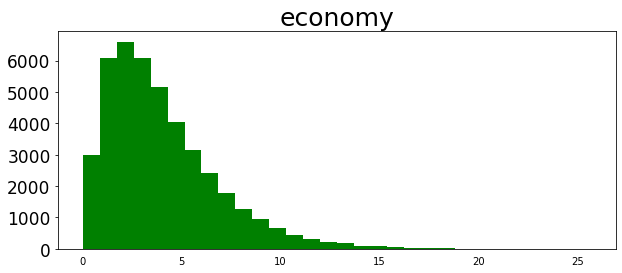

Средняя дистанция =  3.99744533450987
Медианная дистанция =  3.3678073827477872


In [102]:
fig, ax = plt.subplots(figsize=(10,4))
plt.hist(df[(~df['distance'].isna())&(df['order_class']=='economy')]['distance'],
        bins=30, color='green') 
plt.title('economy', fontsize=25)
plt.xlabel(None)
plt.yticks(fontsize=17)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
# plt.legend(frameon=False, fontsize=15)
plt.show()
print('Средняя дистанция = ', df[(~df['distance'].isna())&(df['order_class']=='economy')]['distance'].mean())
print('Медианная дистанция = ', df[(~df['distance'].isna())&(df['order_class']=='economy')]['distance'].median())

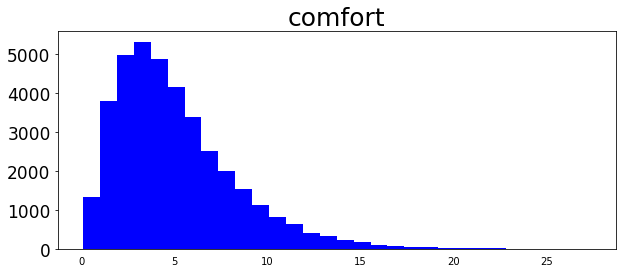

Средняя дистанция =  5.025267356423645
Медианная дистанция =  4.3559393753570586


In [103]:
fig, ax = plt.subplots(figsize=(10,4))
plt.hist(df[(~df['distance'].isna())&(df['order_class']=='comfort')]['distance'],
        bins=30, color='blue') 
plt.title('comfort', fontsize=25)
plt.xlabel(None)
plt.yticks(fontsize=17)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
# plt.legend(frameon=False, fontsize=15)
plt.show()
print('Средняя дистанция = ', df[(~df['distance'].isna())&(df['order_class']=='comfort')]['distance'].mean())
print('Медианная дистанция = ', df[(~df['distance'].isna())&(df['order_class']=='comfort')]['distance'].median())

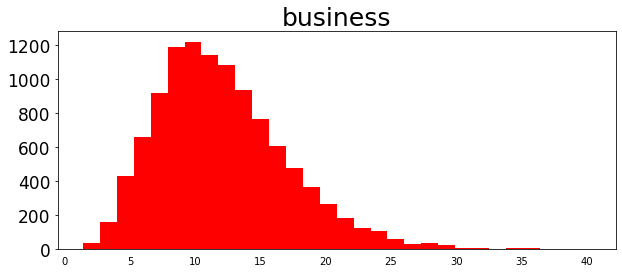

Средняя дистанция =  12.013841616464436
Медианная дистанция =  11.361536191525706


In [104]:
fig, ax = plt.subplots(figsize=(10,4))
plt.hist(df[(~df['distance'].isna())&(df['order_class']=='business')]['distance'],
        bins=30, color='red') 
plt.title('business', fontsize=25)
plt.xlabel(None)
plt.yticks(fontsize=17)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
# plt.legend(frameon=False, fontsize=15)
plt.show()
print('Средняя дистанция = ', df[(~df['distance'].isna())&(df['order_class']=='business')]['distance'].mean())
print('Медианная дистанция = ', df[(~df['distance'].isna())&(df['order_class']=='business')]['distance'].median())

In [110]:
fig, ax = plt.subplots(figsize=(10,4))
plt.hist(df[(~df['distance'].isna())&(df['order_class']=='business')&()]['distance'],
        bins=30, color='red') 
plt.title('business', fontsize=25)
plt.xlabel(None)
plt.yticks(fontsize=17)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
# plt.legend(frameon=False, fontsize=15)
plt.show()
print('Средняя дистанция = ', df[(~df['distance'].isna())&(df['order_class']=='business')]['distance'].mean())
print('Медианная дистанция = ', df[(~df['distance'].isna())&(df['order_class']=='business')]['distance'].median())

surge
no surge    7088
surge       3707
Name: user_id, dtype: int64

## 4. Повышенный спрос

In [146]:
t2 = df.groupby(['hour','order_class','surge']).agg({'user_id':'count','order_made':'sum','ride_completed':'sum'})
t2['conv_order_made'] = t2['order_made'] / t2['user_id']
t2['conv_ride_completed'] = t2['ride_completed'] / t2['order_made']
t2.sort_values(by='conv_order_made')
t2[120:180]

# Если в 23 вечера и 2 ночи бизнес-класс утра увеличить цену на поездки, то заработаем на 5% больше 
# с незначительным снижением конверсии, потому что конверсии при повышенном спросе и его отсутствии 
# примерно одинаковые, значит, пользователи готовы платить. 
# 3 часа ночи комфорту
# в 5 часов утра всем
# 6 и 10 утра эконом

user_id  order_made  ride_completed  \
hour order_class surge                                           
20   business    no surge      111          88              81   
                 surge         384         261             226   
     comfort     no surge      434         352             315   
                 surge        1120         750             660   
     economy     no surge      486         414             336   
                 surge        1271         849             718   
21   business    no surge      116          97              89   
                 surge         347         213             182   
     comfort     no surge      383         303             252   
                 surge        1193         802             689   
     economy     no surge      475         404             342   
                 surge        1391         933             773   
22   business    no surge      342         291             263   
                 surge         106          87              78   
     comfort     no surge     1220        1040             894   
                 surge         373         295             259   
     economy     no surge     1422        1224             997   
                 surge         372         298             240   
23   business    no surge      355         300             260   
                 surge          90          74              62   
     comfort     no surge     1230        1056             895   
                 surge         312         244             202   
     economy     no surge     1362        1198             984   
                 surge         401         319             251   

                           conv_order_made  conv_ride_completed  
hour order_class surge                                           
20   business    no surge         0.792793             0.920455  
                 surge            0.679688             0.865900  
     comfort     no surge         0.811060             0.894886  
                 surge            0.669643             0.880000  
     economy     no surge         0.851852             0.811594  
                 surge            0.667978             0.845701  
21   business    no surge         0.836207             0.917526  
                 surge            0.613833             0.854460  
     comfort     no surge         0.791123             0.831683  
                 surge            0.672255             0.859102  
     economy     no surge         0.850526             0.846535  
                 surge            0.670740             0.828510  
22   business    no surge         0.850877             0.903780  
                 surge            0.820755             0.896552  
     comfort     no surge         0.852459             0.859615  
                 surge            0.790885             0.877966  
     economy     no surge         0.860759             0.814542  
                 surge            0.801075             0.805369  
23   business    no surge         0.845070             0.866667  
                 surge            0.822222             0.837838  
     comfort     no surge         0.858537             0.847538  
                 surge            0.782051             0.827869  
     economy     no surge         0.879589             0.821369  
                 surge            0.795511             0.786834

In [153]:
t3 = df.groupby(['hour','city_center_order','rfm']).agg({'user_id':'count','order_made':'sum','ride_completed':'sum'})
t3['conv_order_made'] = t3['order_made'] / t3['user_id']
t3['conv_ride_completed'] = t3['ride_completed'] / t3['order_made']
t3.sort_values(by='conv_order_made')[:30]

,,,user_id,order_made,ride_completed,conv_order_made,conv_ride_completed
hour,city_center_order,rfm,,,,,
19,0,high,207,107,99,0.516908,0.925234
7,0,high,222,119,107,0.536036,0.899160
19,0,medium,733,399,343,0.544338,0.859649
8,0,high,223,123,104,0.551570,0.845528
9,0,medium,780,434,358,0.556410,0.824885
8,0,medium,782,439,372,0.561381,0.847380
9,0,high,246,139,126,0.565041,0.906475
20,0,high,212,120,100,0.566038,0.833333
21,0,medium,770,439,363,0.570130,0.826879
